In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import neighbors as skneighbors

# Our classes
sys.path.insert(0, os.getcwd() + '/../')

from src.utils import dataset
from src.utils import data
from src.utils import evaluation
from src.supervised_learning.k_nearest_neighbors import KNearestNeighbors

# K-Nearest Neighbors

In [2]:
# Load dataset
iris_data = datasets.load_iris()
x = iris_data.data
y = iris_data.target
x_train, y_train, x_test, y_test = dataset.split_train_test_dataset(x, y, split_size=0.6)

/Users/kristof/Codes/explainable-ml/examples/../src/supervised_learning/k_nearest_neighbors.py:101: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.reshape(x_square, (-1, 1)) + y_square - 2.*x_y)


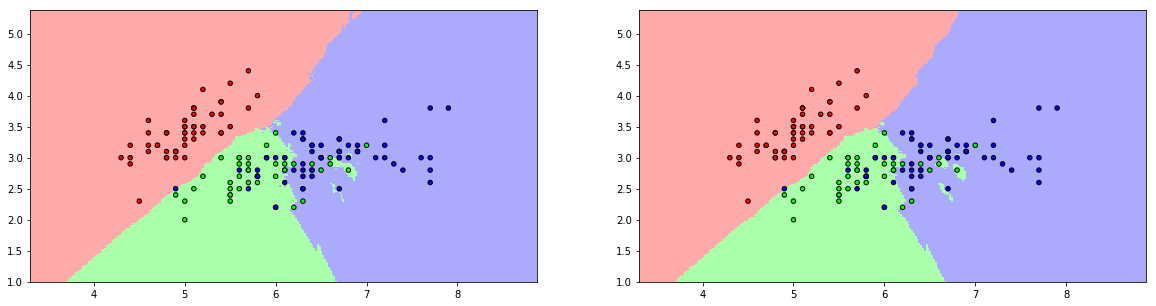

In [16]:
# Parameters for classification
n_neighbors = 15
n_classes = 2
h = .02

x_train_slice = x[:, :n_classes]
y_train_slice = y

# Classify the values
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
plt.figure(1, figsize=(20, 5))

# Get the x_test
x_min, x_max = x_train_slice[:, 0].min() - 1, x_train_slice[:, 0].max() + 1
y_min, y_max = x_train_slice[:, 1].min() - 1, x_train_slice[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_test_slice = np.c_[xx.ravel(), yy.ravel()]

# Their Classifier
clf = skneighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
clf = clf.fit(x_train_slice, y_train_slice)
z_theirs = clf.predict(x_test_slice)
z_theirs = np.reshape(z_theirs, xx.shape)

# Our Classifier
clf = KNearestNeighbors(k=n_neighbors)
z_ours = clf.predict(x_train_slice, y_train_slice, x_test_slice)
z_ours = np.reshape(z_ours, xx.shape)

# Color map for figures
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, z in enumerate([z_ours, z_theirs]):
    plt.subplot(1, 2, i+1)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x_train_slice[:, 0], x_train_slice[:, 1], c=y_train_slice, cmap=cmap_bold, edgecolor='k', s=20)

plt.show()